In [66]:
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import sklearn.tree as tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz


DATA CLEANING

In [67]:
df= pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [68]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [69]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
#enggak ada null tapi mereka menggunakan unknown untuk data yang tidak diketahui, dari sini kita bisa mencari tau berapa banyak data yang hilang
df.eq('unknown').sum().to_frame()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [71]:
#kita mengubah unknown menjadi null dan menghilangkan null
df_clean = pd.read_csv('bank-additional-full.csv',sep=';', na_values='unknown')
df_clean = df_clean.dropna()
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [72]:
#mengecek sekali lagi apakah ada data unknown
df_clean.eq('unknown').sum().to_frame()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [73]:
df_clean.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [75]:
#kita perlu mengubah dari string menjadi integer
encoded_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week' ,'poutcome', 'y']

encoder = LabelEncoder()

for col in encoded_cols :
    df_clean[col] = encoder.fit_transform(df_clean[col])
    print(col, encoder.classes_)

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital ['divorced' 'married' 'single']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']
y ['no' 'yes']


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  int32  
 2   marital         30488 non-null  int32  
 3   education       30488 non-null  int32  
 4   default         30488 non-null  int32  
 5   housing         30488 non-null  int32  
 6   loan            30488 non-null  int32  
 7   contact         30488 non-null  int32  
 8   month           30488 non-null  int32  
 9   day_of_week     30488 non-null  int32  
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  int32  
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

DATA PREPARATION

In [77]:
y = df_clean['y'].values
X = df_clean.drop('y', axis=1).values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

Logistic Regression

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
pred_cv1 = model.predict(X_test)

In [81]:
print(accuracy_score(y_test,pred_cv1))
matrix = confusion_matrix(y_test,pred_cv1)
print(matrix)

0.8978353558543785
[[5161  165]
 [ 458  314]]


K-Nearest Neighbors

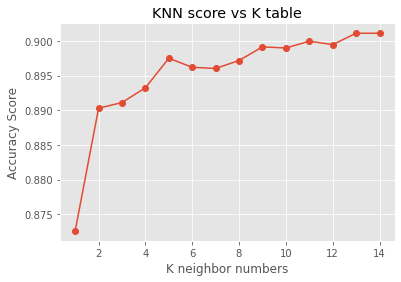

In [82]:
def knnTableTrainTest(maxK, X_train, y_train, X_test, y_test):
    list_score = []
    for n in range(1, maxK):
        model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
        score = model_knn.score(X_test, y_test)
        list_score.append(score)

    plt.plot(range(1,maxK), list_score, marker="o")
    plt.xlabel("K neighbor numbers")
    plt.ylabel("Accuracy Score")
    plt.title("KNN score vs K table")
    
knnTableTrainTest(15, X_train, y_train, X_test, y_test)

In [83]:
#dari data diatas kita mendapatkan bahwa n_neighbors terbaik adalah 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [84]:
pred_cv2 = knn.predict(X_test)

In [85]:
print(accuracy_score(y_test, pred_cv2))
matrix = confusion_matrix(y_test, pred_cv2)
print(matrix)

0.897179403082978
[[5134  192]
 [ 435  337]]


Decision Tree Algoritm

In [86]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
pred_cv3 = dt.predict(X_test)

In [88]:
print(accuracy_score(y_test, pred_cv3))
matrix = confusion_matrix(y_test, pred_cv3)
print(matrix)

0.882748442112168
[[4956  370]
 [ 345  427]]


SVM

In [89]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [90]:
pred_cv4 = svm_model.predict(X_test)

In [91]:
print(accuracy_score(y_test, pred_cv4))
matrix = confusion_matrix(y_test, pred_cv4)
print(matrix)

0.884224335847819
[[5226  100]
 [ 606  166]]


Random Forest

In [103]:
rf = RandomForestClassifier(max_depth=1)
model_rf = rf.fit(X_train, y_train)

In [93]:
pred_cv5 = rf.predict(X_test)

In [100]:
print(accuracy_score(y_test, pred_cv5))
matrix = confusion_matrix(y_test, pred_cv5)
print(matrix)

0.8879960642833716
[[5280   46]
 [ 637  135]]


Random Forest : Important Features

In [95]:
features = df_clean[["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]]

In [107]:
rf_importance = pd.DataFrame({"feature name": features.columns, "value of importance": model_rf.feature_importances_}).sort_values(by="value of importance", ascending=False)
rf_importance.set_index('feature name', inplace=True)
rf_importance

,value of importance
feature name,
nr.employed,0.21
euribor3m,0.20
duration,0.16
pdays,0.09
cons.conf.idx,0.09
poutcome,0.08
emp.var.rate,0.05
previous,0.05
age,0.02


<AxesSubplot:ylabel='feature name'>

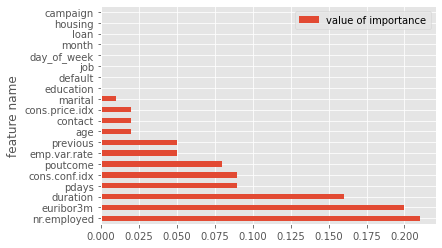

In [108]:
rf_importance.plot(kind='barh')

dari sini kita melihat adanya beberapa fitur yang memiliki nilai yang 0, menunjukan fitur tersebut tidak berpengaruh terhadap pemilihannya kepada deposito atau tidak, seharusnya kita dapat menghilangkan fitur ini dan tidak mempengaruhi accuracy score

Naive Bayes

In [109]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [110]:
pred_cv6 = rf.predict(X_test)

In [111]:
print(accuracy_score(y_test, pred_cv6))
matrix = confusion_matrix(y_test, pred_cv6)
print(matrix)

0.8734011151197114
[[5326    0]
 [ 772    0]]


Accuracy Score

In [113]:
print('Logistic Regression', accuracy_score(y_test,pred_cv1))
print('KNN',accuracy_score(y_test, pred_cv2))
print('Decision Tree',accuracy_score(y_test, pred_cv3))
print('SVM', accuracy_score(y_test, pred_cv4))
print('Random Forest',accuracy_score(y_test, pred_cv5))
print('Naive Bayes',accuracy_score(y_test, pred_cv6))

Logistic Regression 0.8978353558543785
KNN 0.897179403082978
Decision Tree 0.882748442112168
SVM 0.884224335847819
Random Forest 0.8879960642833716
Naive Bayes 0.8734011151197114


secara dari data, dikarenakan banyak fitur yang tidak memiliki pengaruh penting(feature of importance), seharusnya Random Forest yang digunakan di model ini